In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Data for Cleaning & Modeling.csv')
metadata = pd.read_csv('Metadata.csv')

C:\Users\siris\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#### Train data ####

In [3]:
data.head() #shape(400000, 32)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [4]:
data['X1'] = data['X1'].str.rstrip('%')
data['X1'] = data['X1'].astype(float)/100

data['X30'] = data['X30'].str.rstrip('%')
data['X30'] = data['X30'].astype(float)/100

In [5]:
## Handling missing values and replace by mean values


# X1 - Interest Rate of Loan - using median values to avoid skewness of mean
# data['X1'] = sdata['X1'])
#median_X1 = data['X1'].mean()
data['X1'].fillna((data['X1'].median()), inplace=True)



# # X13 - Annual income of borrower
mean_X13 = data['X13'].mean()
data['X13'].fillna(value=mean_X13, inplace=True)


# X30 - Revolving line utilization rate or amount of credit the borrower is using relative to all provided revolving credit
data['X30'].fillna((data['X30'].median()), inplace=True)


In [6]:
#data.X1

In [7]:
## Fill NAs with 0's

# X26 - Number of months since last public record
data['X26'] = data['X26'].fillna(0)
# X25 - Number of months since borrower's last delinquency
data['X25'] = data['X25'].fillna(0)

In [8]:
## Drop columns

# X2 - unique IDs
data.drop('X2', axis=1, inplace=True)

# X3 - unique IDs
data.drop('X3', axis=1, inplace=True)

# X16 - Reason for loan provided by borrower
data.drop('X16', axis=1, inplace=True)

# X10 - Employer or job title
data.drop('X10', axis=1, inplace=True)

# X30 - Revolving line utilization rate or amount of credit the borrower is using relative to all provided revolving credit
#data.drop('X30', axis=1, inplace=True)

# X18 - Loan title as provided by borrower
data.drop('X18', axis=1, inplace=True)

# X12 - Home ownership - concat with original dataset
data.drop('X12', axis=1, inplace=True)

# X15 - Date loan was issued
data.drop('X15', axis=1, inplace=True)

# X23 - Date of earliest reported credit line
data.drop('X23', axis=1, inplace=True)

In [9]:
data.head()

,X1,X4,X5,X6,X7,X8,X9,X11,X13,X14,...,X22,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,0.1189,"$25,000","$25,000","$19,080",36 months,B,B4,< 1 year,85000.0,VERIFIED - income,...,0.0,0.0,0.0,0.0,10.0,0.0,28854.0,0.521,42.0,f
1,0.1071,"$7,000","$7,000",$673,36 months,B,B5,< 1 year,65000.0,not verified,...,0.0,0.0,0.0,0.0,7.0,0.0,33623.0,0.767,7.0,f
2,0.1699,"$25,000","$25,000","$24,725",36 months,D,D3,1 year,70000.0,VERIFIED - income,...,0.0,0.0,41.0,0.0,10.0,0.0,19878.0,0.663,17.0,f
3,0.1311,"$1,200","$1,200","$1,200",36 months,C,C2,10+ years,54000.0,not verified,...,0.0,0.0,64.0,0.0,5.0,0.0,2584.0,0.404,31.0,f
4,0.1357,"$10,800","$10,800","$10,692",36 months,C,C3,6 years,32000.0,not verified,...,0.0,1.0,58.0,0.0,14.0,0.0,3511.0,0.256,40.0,f


In [10]:
# X12 - Home ownership - concat with original dataset
data.drop('X11', axis=1, inplace=True)

In [11]:
# Dropping rest of NA's

data.dropna(inplace=True)

In [12]:
data.isnull().sum().sort_values(ascending=False)

X1     0
X21    0
X31    0
X30    0
X29    0
X28    0
X27    0
X26    0
X25    0
X24    0
X22    0
X20    0
X4     0
X19    0
X17    0
X14    0
X13    0
X9     0
X8     0
X7     0
X6     0
X5     0
X32    0
dtype: int64

In [13]:
data.head()

,X1,X4,X5,X6,X7,X8,X9,X13,X14,X17,...,X22,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,0.1189,"$25,000","$25,000","$19,080",36 months,B,B4,85000.0,VERIFIED - income,debt_consolidation,...,0.0,0.0,0.0,0.0,10.0,0.0,28854.0,0.521,42.0,f
1,0.1071,"$7,000","$7,000",$673,36 months,B,B5,65000.0,not verified,credit_card,...,0.0,0.0,0.0,0.0,7.0,0.0,33623.0,0.767,7.0,f
2,0.1699,"$25,000","$25,000","$24,725",36 months,D,D3,70000.0,VERIFIED - income,debt_consolidation,...,0.0,0.0,41.0,0.0,10.0,0.0,19878.0,0.663,17.0,f
3,0.1311,"$1,200","$1,200","$1,200",36 months,C,C2,54000.0,not verified,debt_consolidation,...,0.0,0.0,64.0,0.0,5.0,0.0,2584.0,0.404,31.0,f
4,0.1357,"$10,800","$10,800","$10,692",36 months,C,C3,32000.0,not verified,debt_consolidation,...,0.0,1.0,58.0,0.0,14.0,0.0,3511.0,0.256,40.0,f


In [14]:
# Removing $ signs and converting to numberic

data['X4'] = data['X4'].str.replace(',','')
data['X4'] = pd.to_numeric(data['X4'].str.lstrip('$'))

data['X5'] = data['X5'].str.replace(',','')
data['X5'] = pd.to_numeric(data['X5'].str.lstrip('$'))

data['X6'] = data['X6'].str.replace(',','')
data['X6'] = pd.to_numeric(data['X6'].str.lstrip('$'))



In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338730 entries, 0 to 399999
Data columns (total 23 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338730 non-null  float64
 1   X4      338730 non-null  int64  
 2   X5      338730 non-null  int64  
 3   X6      338730 non-null  int64  
 4   X7      338730 non-null  object 
 5   X8      338730 non-null  object 
 6   X9      338730 non-null  object 
 7   X13     338730 non-null  float64
 8   X14     338730 non-null  object 
 9   X17     338730 non-null  object 
 10  X19     338730 non-null  object 
 11  X20     338730 non-null  object 
 12  X21     338730 non-null  float64
 13  X22     338730 non-null  float64
 14  X24     338730 non-null  float64
 15  X25     338730 non-null  float64
 16  X26     338730 non-null  float64
 17  X27     338730 non-null  float64
 18  X28     338730 non-null  float64
 19  X29     338730 non-null  float64
 20  X30     338730 non-null  float64
 21  X31     33

In [16]:
#data.to_csv('out.csv', index=False) 

In [17]:
# X19 - First 3 numbers of zipcode
data.drop('X19', axis=1, inplace=True)

# X20 - State of borrower
data.drop('X20', axis=1, inplace=True)

# X29 - Total credit, revolving balance
data.drop('X29', axis=1, inplace=True)

# X32 - Initial listing status of the loan
data.drop('X32', axis=1, inplace=True)

# X27 - Number of open credit lines in the borrower's credit line
data.drop('X27', axis=1, inplace=True)

# X31 - Total number of credit lines currently in the borrower line's credit
data.drop('X31', axis=1, inplace=True)

In [18]:
data.head()

,X1,X4,X5,X6,X7,X8,X9,X13,X14,X17,X21,X22,X24,X25,X26,X28,X30
0,0.1189,25000,25000,19080,36 months,B,B4,85000.0,VERIFIED - income,debt_consolidation,19.48,0.0,0.0,0.0,0.0,0.0,0.521
1,0.1071,7000,7000,673,36 months,B,B5,65000.0,not verified,credit_card,14.29,0.0,0.0,0.0,0.0,0.0,0.767
2,0.1699,25000,25000,24725,36 months,D,D3,70000.0,VERIFIED - income,debt_consolidation,10.50,0.0,0.0,41.0,0.0,0.0,0.663
3,0.1311,1200,1200,1200,36 months,C,C2,54000.0,not verified,debt_consolidation,5.47,0.0,0.0,64.0,0.0,0.0,0.404
4,0.1357,10800,10800,10692,36 months,C,C3,32000.0,not verified,debt_consolidation,11.63,0.0,1.0,58.0,0.0,0.0,0.256


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338730 entries, 0 to 399999
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338730 non-null  float64
 1   X4      338730 non-null  int64  
 2   X5      338730 non-null  int64  
 3   X6      338730 non-null  int64  
 4   X7      338730 non-null  object 
 5   X8      338730 non-null  object 
 6   X9      338730 non-null  object 
 7   X13     338730 non-null  float64
 8   X14     338730 non-null  object 
 9   X17     338730 non-null  object 
 10  X21     338730 non-null  float64
 11  X22     338730 non-null  float64
 12  X24     338730 non-null  float64
 13  X25     338730 non-null  float64
 14  X26     338730 non-null  float64
 15  X28     338730 non-null  float64
 16  X30     338730 non-null  float64
dtypes: float64(9), int64(3), object(5)
memory usage: 46.5+ MB


In [20]:
from sklearn import preprocessing

In [21]:
# integer labels for categorical variables

#X7, X14, X15, X17, X23, X8, X9

le = preprocessing.LabelEncoder()

# fit label encorder and return encoded integer labels for categorical string features
data['X7'] = le.fit_transform(data['X7'].values)
data['X14'] = le.fit_transform(data['X14'].values)
#data['X15'] = le.fit_transform(data['X15'].values)
data['X17'] = le.fit_transform(data['X17'].values)
#data['X23'] = le.fit_transform(data['X23'].values)
data['X8'] = le.fit_transform(data['X8'].values)
data['X9'] = le.fit_transform(data['X9'].values)

In [22]:
#data['X1'] = data['X1'].astype(int)
#data['X2'] = data['X2'].astype(int)
#data['X3'] = data['X3'].astype(int)
#data['X13'] = data['X13'].astype(int)
#data['X21'] = data['X21'].astype(int)
#data['X22'] = data['X22'].astype(int)
# data['X24'] = data['X24'].astype(int)
# data['X25'] = data['X25'].astype(int)
# data['X26'] = data['X26'].astype(int)
# data['X28'] = data['X28'].astype(int)
# data['X30'] = data['X30'].astype(int)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338730 entries, 0 to 399999
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338730 non-null  float64
 1   X4      338730 non-null  int64  
 2   X5      338730 non-null  int64  
 3   X6      338730 non-null  int64  
 4   X7      338730 non-null  int32  
 5   X8      338730 non-null  int32  
 6   X9      338730 non-null  int32  
 7   X13     338730 non-null  float64
 8   X14     338730 non-null  int32  
 9   X17     338730 non-null  int32  
 10  X21     338730 non-null  float64
 11  X22     338730 non-null  float64
 12  X24     338730 non-null  float64
 13  X25     338730 non-null  float64
 14  X26     338730 non-null  float64
 15  X28     338730 non-null  float64
 16  X30     338730 non-null  float64
dtypes: float64(9), int32(5), int64(3)
memory usage: 40.1 MB


#### Test Data ####

In [24]:
data_test = pd.read_csv('Holdout for Testing.csv')

In [25]:
data_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,NaN,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,...,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
1,NaN,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,...,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
2,NaN,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,...,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
3,NaN,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,...,Feb-99,1,NaN,114.0,13,1,9586,43.80%,21,w
4,NaN,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,...,2-Dec,0,48.0,NaN,27,0,31842,41.30%,43,w


In [26]:
data_test['X30'] = data_test['X30'].str.rstrip('%')
data_test['X30'] = data_test['X30'].astype(float)/100

In [27]:
# # X13 - Annual income of borrower
data_test['X13'].fillna((data_test['X13'].mean()), inplace=True)


# X30 - Revolving line utilization rate or amount of credit the borrower is using relative to all provided revolving credit
data_test['X30'].fillna((data_test['X30'].median()), inplace=True)


In [28]:
## Fill NAs with 0's

# X26 - Number of months since last public record
data_test['X26'] = data_test['X26'].fillna(0)
# X25 - Number of months since borrower's last delinquency
data_test['X25'] = data_test['X25'].fillna(0)

In [29]:
## Drop columns

# X2 - unique IDs
data_test.drop('X2', axis=1, inplace=True)

# X3 - unique IDs
data_test.drop('X3', axis=1, inplace=True)

# X16 - Reason for loan provided by borrower
data_test.drop('X16', axis=1, inplace=True)

# X10 - Employer or job title
data_test.drop('X10', axis=1, inplace=True)

# X30 - Revolving line utilization rate or amount of credit the borrower is using relative to all provided revolving credit
#data.drop('X30', axis=1, inplace=True)

# X18 - Loan title as provided by borrower
data_test.drop('X18', axis=1, inplace=True)

# X12 - Home ownership - concat with original dataset
data_test.drop('X12', axis=1, inplace=True)

# X11 
data_test.drop('X11', axis=1, inplace=True)


# X15 - Date loan was issued
data_test.drop('X15', axis=1, inplace=True)

# X23 - Date of earliest reported credit line
data_test.drop('X23', axis=1, inplace=True)

In [30]:
#data_test.dropna(inplace=True)

In [31]:
# Removing $ signs and converting to numberic

data_test['X4'] = data_test['X4'].str.replace(',','')
data_test['X4'] = pd.to_numeric(data_test['X4'].str.lstrip('$'))

data_test['X5'] = data_test['X5'].str.replace(',','')
data_test['X5'] = pd.to_numeric(data_test['X5'].str.lstrip('$'))

data_test['X6'] = data_test['X6'].str.replace(',','')
data_test['X6'] = pd.to_numeric(data_test['X6'].str.lstrip('$'))


In [32]:
# X19 - First 3 numbers of zipcode
data_test.drop('X19', axis=1, inplace=True)

# X20 - State of borrower
data_test.drop('X20', axis=1, inplace=True)

# X29 - Total credit, revolving balance
data_test.drop('X29', axis=1, inplace=True)

# X32 - Initial listing status of the loan
data_test.drop('X32', axis=1, inplace=True)

# X27 - Number of open credit lines in the borrower's credit line
data_test.drop('X27', axis=1, inplace=True)

# X31 - Total number of credit lines currently in the borrower line's credit
data_test.drop('X31', axis=1, inplace=True)

In [33]:
# integer labels for categorical variables

#X7, X14, X15, X17, X23, X8, X9

le = preprocessing.LabelEncoder()

# fit label encorder and return encoded integer labels for categorical string features
data_test['X7'] = le.fit_transform(data_test['X7'].values)
data_test['X14'] = le.fit_transform(data_test['X14'].values)
#data_test['X15'] = le.fit_transform(data_test['X15'].values)
data_test['X17'] = le.fit_transform(data_test['X17'].values)
#data_test['X23'] = le.fit_transform(data_test['X23'].values)
data_test['X8'] = le.fit_transform(data_test['X8'].values)
data_test['X9'] = le.fit_transform(data_test['X9'].values)

In [34]:
data_test.head()

,X1,X4,X5,X6,X7,X8,X9,X13,X14,X17,X21,X22,X24,X25,X26,X28,X30
0,NaN,6000,6000,6000,0,2,14,68000.0,0,2,28.31,0,1,26.0,0.0,0,0.645
1,NaN,24000,24000,24000,0,0,0,110480.0,0,2,16.03,0,1,0.0,0.0,0,0.262
2,NaN,35000,35000,35000,0,2,11,86000.0,0,2,32.49,0,0,0.0,0.0,0,0.499
3,NaN,10000,10000,10000,1,3,15,30000.0,1,2,32.96,0,1,0.0,114.0,1,0.438
4,NaN,24000,24000,24000,1,1,5,82500.0,0,2,31.03,0,0,48.0,0.0,0,0.413


#### Model ####

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.metrics import mean_squared_error

#### Regression Trees ####

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
# # extract target variable (interest rate) from training data
y = data['X1']

# # remove interest rate column from training data
X = data.drop(['X1'], axis=1)

In [38]:
# Set seed for reproducibility
SEED = 1
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = \
train_test_split(X, y,
test_size=0.3,
random_state=SEED)

In [39]:
# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=400,
min_samples_leaf=0.12,
random_state=SEED)
# Fit 'rf' to the training set
rf.fit(X_train, y_train)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)
y_pred_train=rf.predict(X_train)
# Evaluate the test set RMSE
rmse_test = mean_squared_error(y_test, y_pred)**(1/2)
rmse_train = mean_squared_error(y_train, y_pred_train)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))
print('Train set RMSE of rf: {:.2f}'.format(rmse_train))

Test set RMSE of rf: 0.02
Train set RMSE of rf: 0.02


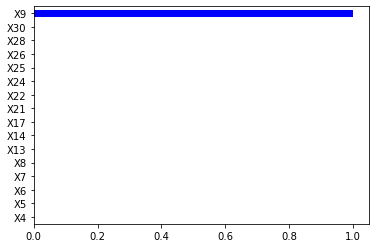

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_,
index = X_test.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='blue')
plt.show()

### Gradient Boosting ###

In [41]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4,
                               n_estimators=200,
                               random_state=2)

# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred_Gboost = gb.predict(X_test)

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test, y_pred_Gboost)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 0.017


In [42]:
y_pred_Gboost

array([0.19640185, 0.15904617, 0.10435319, ..., 0.1125955 , 0.08674887,
       0.0866505 ])

In [43]:
type(y_pred_Gboost)

numpy.ndarray

Text(0.5, 1.0, 'Feature Importance (MDI)')

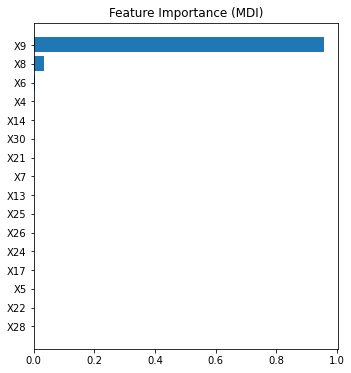

In [44]:
feature_importance = gb.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

#### Predicting on Holdout Test File ####

In [45]:
data_test.head()

,X1,X4,X5,X6,X7,X8,X9,X13,X14,X17,X21,X22,X24,X25,X26,X28,X30
0,NaN,6000,6000,6000,0,2,14,68000.0,0,2,28.31,0,1,26.0,0.0,0,0.645
1,NaN,24000,24000,24000,0,0,0,110480.0,0,2,16.03,0,1,0.0,0.0,0,0.262
2,NaN,35000,35000,35000,0,2,11,86000.0,0,2,32.49,0,0,0.0,0.0,0,0.499
3,NaN,10000,10000,10000,1,3,15,30000.0,1,2,32.96,0,1,0.0,114.0,1,0.438
4,NaN,24000,24000,24000,1,1,5,82500.0,0,2,31.03,0,0,48.0,0.0,0,0.413


In [46]:
X_holdout = data_test.drop(['X1'], axis=1)
X_holdout.head()

,X4,X5,X6,X7,X8,X9,X13,X14,X17,X21,X22,X24,X25,X26,X28,X30
0,6000,6000,6000,0,2,14,68000.0,0,2,28.31,0,1,26.0,0.0,0,0.645
1,24000,24000,24000,0,0,0,110480.0,0,2,16.03,0,1,0.0,0.0,0,0.262
2,35000,35000,35000,0,2,11,86000.0,0,2,32.49,0,0,0.0,0.0,0,0.499
3,10000,10000,10000,1,3,15,30000.0,1,2,32.96,0,1,0.0,114.0,1,0.438
4,24000,24000,24000,1,1,5,82500.0,0,2,31.03,0,0,48.0,0.0,0,0.413


In [47]:
holdout_test = gb.predict(X_test)

In [48]:
holdout_test

array([0.19640185, 0.15904617, 0.10435319, ..., 0.1125955 , 0.08674887,
       0.0866505 ])

In [49]:
df_result = pd.DataFrame(holdout_test, columns = ['X1_pred'])

In [50]:
df_result = round(df_result*100, 2) 
df_result = df_result.astype(str) + '%'
df_result

,X1_pred
0,19.64%
1,15.9%
2,10.44%
3,12.68%
4,13.72%
...,...
101614,19.76%
101615,15.08%
101616,11.26%
101617,8.67%


In [51]:
df_result.to_csv('Results from sirisha4.csv')

I have used the Random Forest and Gradient Boosting Algorithms for the prediction of interest rates. Random Forent trains each tree independently, and this randomness helps create a more robust model. The main limitation of random forest is that a large number of trees could make the model slow. Also if we have any features having a similar relevance then smaller groups are favored over larger groups. While Random Forest builds each tree independently, gradient boosting builds one tree at a time. The results of RF are combined at the end of the process whereas GB algorithm combines results along the way. However, GB may not always be a good choice if there is too much noise in the data.